# Filtragem na Frenquêcia de Fourier

## 1. Passando o filtro do domínio do espaço para o domínio da frequência de Fourier

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('noisy_peppers.jpeg',0)
m, n =  img.shape
print(img.shape)

(225, 225)


In [3]:
# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, laplacian, sobel_x]
filter_name = ['gaussian','laplacian', 'sobel_x']

# É preciso passar o parâmetro 's', que é o tamanho (shape) da imagem a ser filtrada
fft_filters = [np.fft.fft2(x, s = (m, n)) for x in filters]

fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

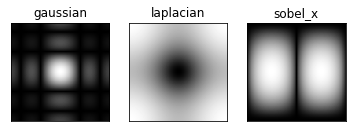

In [4]:
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

## 2. Aplicando os filtros na imagem ruidosa no domínio da frequência de Fourier

### Dada a imagem *img*, vamos realizar a filtragem no domínio da frequência, passo a passo:

    1 - Passar a imagem a ser filtrada para o domínio de Fourier:

    1.1 - Usando Numpy:

In [5]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f) # deslocar o espectro para o centro
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Além da magnitude, normalizamos com o a função logarítmica

    1.2 - Ou usando Opencv (a escolha é sua):

In [6]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

    2 - Aplicar máscara. Ou seja, multiplicar o filtro na frequência pela imagem  na frequência pixel a pixel:

In [7]:
# Aqui sigo usando o método com o Numpy
list_fshift = [fshift*mask for mask in mag_spectrum]

    3 - Desfazer o *shift* da frenquência:

In [8]:
list_f_ishift = [np.fft.ifftshift(fshift) for fshift in list_fshift]

    4 - Calcular a transformada de Fourier inversa da imagem resultante:

In [9]:
list_img_back = [np.fft.ifft2(f_ishift) for f_ishift in list_f_ishift]

    5 - Calcular magnitude da transformada inversa e plotar a imagem original e a imagem filtrada para cada filtro: 

In [10]:
list_img_back = [np.abs(img_back) for img_back in list_img_back]

142
143
144


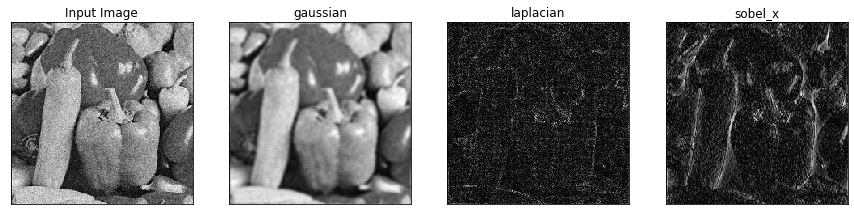

In [11]:
aux = 141
plt.figure(figsize=(15,20))
plt.subplot(aux),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

for idx, img_back in enumerate(list_img_back):
    aux += 1
    
    print(aux)
    plt.subplot(aux),plt.imshow(img_back, cmap = 'gray')
    plt.title(filter_name[idx]), plt.xticks([]), plt.yticks([])
plt.show()